In [45]:
import numpy as np
import tensorflow as tf
from numpy import expand_dims
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
import IPython.display as display
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


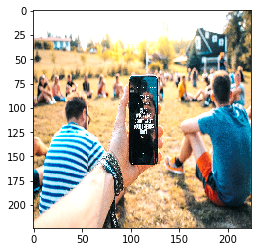

In [46]:
# loading the image
IMAGE_PATH = './mobile.jpg'
img = tf.compat.v2.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224, 224))
img = tf.compat.v2.keras.preprocessing.image.img_to_array(img)

# view the image
plt.imshow(img/224.)

In [47]:
# load VGG19 pre-trained CNN model
model = tf.keras.applications.vgg19.VGG19(weights='imagenet', 
                                                include_top=True)
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [55]:
# load imagenet id to class label mappings
import requests

response = requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map = response.json()
imgnet_map = {v[1]: k for k, v in imgnet_map.items()}

# make model predictions
img = tf.keras.applications.vgg19.preprocess_input(img)
predictions = model.predict(np.array([img]))
decode_predictions(predictions, top=10)

[[('n03729826', 'matchstick', 0.07718487),
  ('n01930112', 'nematode', 0.039042678),
  ('n03196217', 'digital_clock', 0.033586044),
  ('n04286575', 'spotlight', 0.031653654),
  ('n03666591', 'lighter', 0.031284235),
  ('n03590841', "jack-o'-lantern", 0.014621892),
  ('n02948072', 'candle', 0.014303548),
  ('n03637318', 'lampshade', 0.012150575),
  ('n03759954', 'microphone', 0.010235429),
  ('n04456115', 'torch', 0.009394822)]]

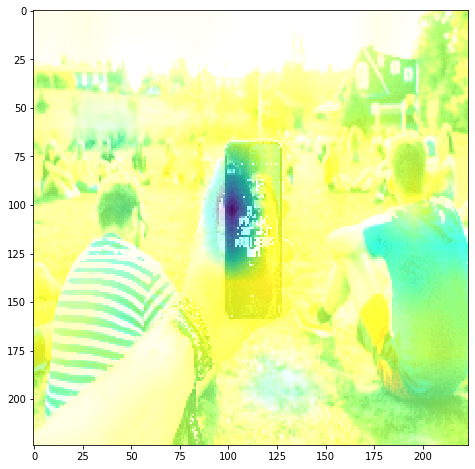

In [49]:
# visualize Occulsion Sensitivity outputs
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

explainer = OcclusionSensitivity()
img_inp = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224, 224))
img_inp = tf.keras.preprocessing.image.img_to_array(img_inp)
grid = explainer.explain(([img_inp], None), model, 487, 20)
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(grid)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


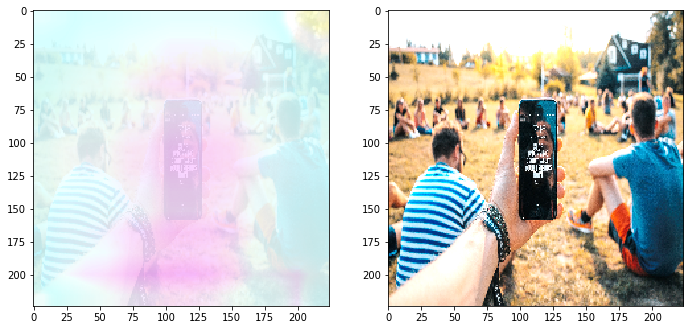

In [50]:
# visualize GradCAM output from Block 1
from tf_explain.core.grad_cam import GradCAM

explainer = GradCAM()
grid1 = explainer.explain(([img], None), model, 'block1_conv2', 487)
fig = plt.figure(figsize = (18, 8))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img_inp / 224.)
ax1.imshow(grid2, alpha=0.9)
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(img_inp / 224.)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


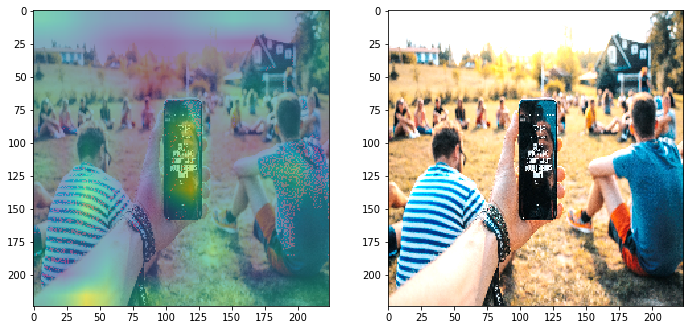

In [51]:
# visualize GradCAM output from Block 5
grid2 = explainer.explain(([img], None), model, 'block5_conv3', 487)
fig = plt.figure(figsize = (18, 8))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img_inp / 224.)
ax1.imshow(grid2, alpha=0.6)
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(img_inp / 224.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


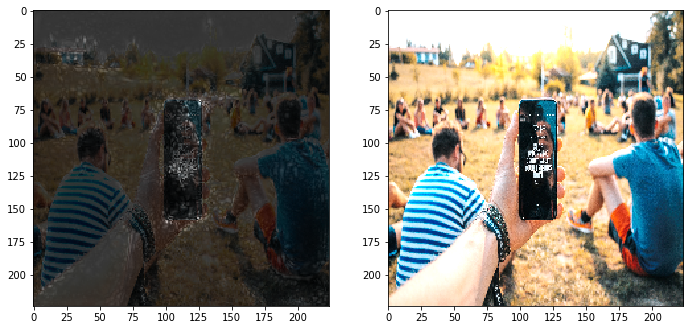

In [53]:
# visualize SmoothGrad output from Block 5
from tf_explain.core.smoothgrad import SmoothGrad

explainer = SmoothGrad()

grid = explainer.explain(([img], None), model, 487, 80, .2)

fig = plt.figure(figsize = (18, 8))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img_inp / 224.)
ax1.imshow(grid, alpha=0.8, cmap='binary_r')
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(img_inp / 224.)